In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)

<ipython-input-2-0dca237e8abf>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-2-0dca237e8abf>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [5]:
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


## **Performing EDA** 

In [11]:
X_train.shape

(7352, 561)

In [12]:
X_test.shape

(2947, 561)

In [15]:
X_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [16]:
X_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

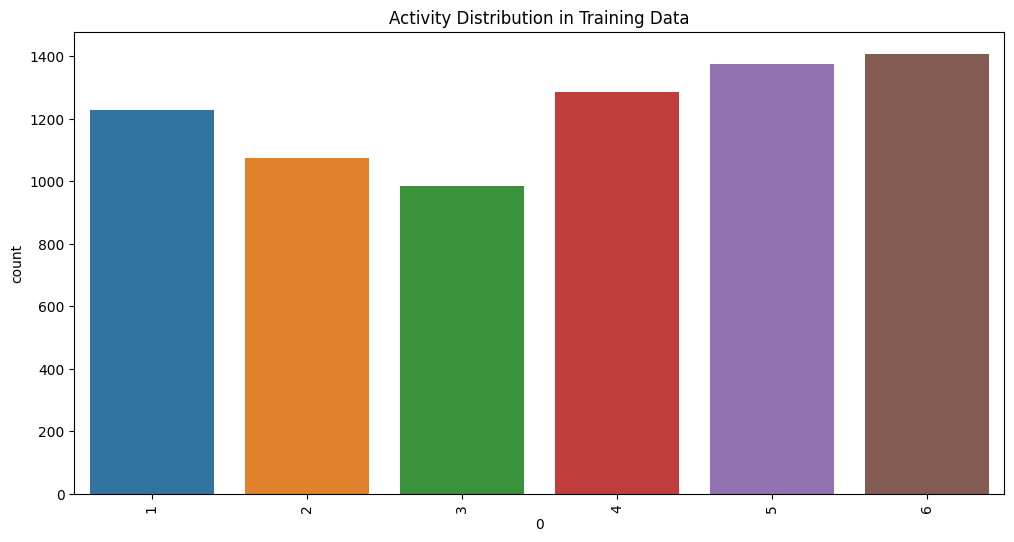

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train[0])  
plt.xticks(rotation=90) 
plt.title("Activity Distribution in Training Data")
plt.show()

Here:

1 WALKING 

2 WALKING_UPSTAIRS

3 WALKING_DOWNSTAIRS

4 SITTING

5 STANDING

6 LAYING


## **Model Training** 

**Using ML Models**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

In [6]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(
        tree_method='gpu_hist',  
        use_label_encoder=False, 
        eval_metric='mlogloss', 
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [6]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Encoding the target labels to start from 0 so we can train xgboost
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [12]:
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  
    y_pred = model.predict(X_test) 
    
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred_decoded)
    f1 = f1_score(y_test, y_pred_decoded, average='weighted') 
    
    results.append({"Model": name, "Accuracy": accuracy, "F1-score": f1})

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred_decoded))


Training Random Forest...
Model: Random Forest
Accuracy: 0.9287
F1-score: 0.9285
              precision    recall  f1-score   support

           1       0.91      0.97      0.94       496
           2       0.89      0.92      0.91       471
           3       0.97      0.86      0.91       420
           4       0.91      0.88      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947


Training SVM...
Model: SVM
Accuracy: 0.9505
F1-score: 0.9504
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.94      0.89      0.91       491
           5       0.91      0.95      0.9

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:55:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:55:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:55:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


Model: XGBoost
Accuracy: 0.9403
F1-score: 0.9401
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.93      0.93       471
           3       0.97      0.92      0.94       420
           4       0.94      0.85      0.89       491
           5       0.88      0.95      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947


Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9613
F1-score: 0.9612
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.97      0.94      0.96       471
           3       0.99      0.97      0.98       420
           4       0.98      0.88      0.93       491
           5       0.90      0.98      0.94

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plotting the results of model for better visualization

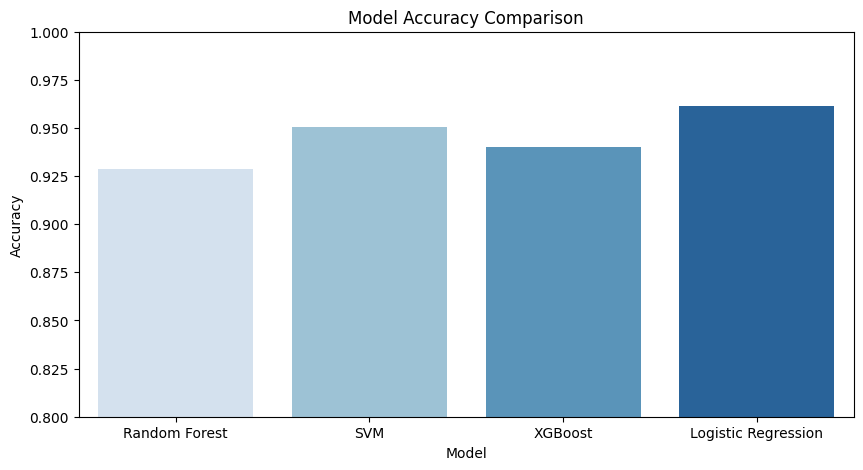

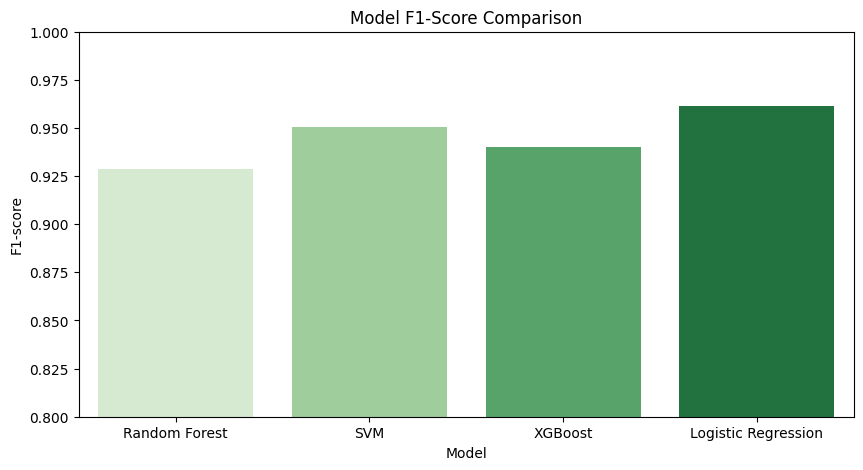

In [13]:
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="Blues")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1)  
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1-score", data=df_results, palette="Greens")
plt.title("Model F1-Score Comparison")
plt.ylim(0.8, 1)  
plt.show()

Conclusion:

Best Model: Logistic Regression achieved the best performance in terms of accuracy and F1-score.

SVM also showed strong results and could be a good alternative to Logistic Regression.
Random Forest and XGBoost performed well, but they were slightly outperformed by the other models.

All models were highly effective for classifying activity classes, with Logistic Regression providing the most balanced and efficient classification.

**Hyperparameter Tuning Using Optuna**

In [8]:
import optuna
from optuna import Trial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [9]:
def objective(trial: Trial, X, y) -> float:
    model_name = trial.suggest_categorical("model", ["RandomForest", "SVM", "XGBoost"])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
        
        model = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf)
    
    elif model_name == "SVM":
        C = trial.suggest_loguniform("C", 1e-5, 1000)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
        gamma = trial.suggest_loguniform("gamma", 1e-5, 1)
        
        
        model = SVC(C=C, kernel=kernel, gamma=gamma)

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 0.1)
        gamma = trial.suggest_loguniform("gamma", 1e-5, 1)
        
    
        model = XGBClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              learning_rate=learning_rate,
                              gamma=gamma)
    
    accuracy = cross_val_score(model, X,y, cv=3, scoring='accuracy').mean()

    return accuracy

In [10]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, X_train,y_train_encoded), n_trials=100)

best_params = study.best_trial.params
best_model_name = best_params['model']

print("Best Model:", best_model_name)
print("Best Hyperparameters:", best_params)
print("Best Accuracy from cross-validation:", study.best_value)


[I 2025-02-18 09:51:50,533] A new study created in memory with name: no-name-9c9c4b2d-fd03-4cf6-bfb0-f682df581dd0
[I 2025-02-18 09:52:00,889] Trial 0 finished with value: 0.9061487606058335 and parameters: {'model': 'RandomForest', 'n_estimators': 93, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.9061487606058335.
<ipython-input-9-fc7471ff2b11>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-5, 1000)
<ipython-input-9-fc7471ff2b11>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-5, 1)
[I 2025-02-18 09:52:14,414] Trial 1 finished with valu

Best Model: SVM
Best Hyperparameters: {'model': 'SVM', 'C': 75.78513082480914, 'kernel': 'rbf', 'gamma': 0.004946444915484186}
Best Accuracy from cross-validation: 0.9481790855877236


In [11]:
if best_model_name == "RandomForest":
    model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf']
    )

elif best_model_name == "SVM":
    model = SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        gamma=best_params['gamma']
    )

elif best_model_name == "XGBoost":
    model = XGBClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        gamma=best_params['gamma']
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM
Accuracy: 0.9647
F1-score: 0.9646
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.96       471
           3       0.99      0.95      0.97       420
           4       0.98      0.90      0.94       491
           5       0.92      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.96      0.96      2947



Conclusion (With Hyperparameter Tuning):

Best Model: SVM with Hyperparameter Tuning achieved the best performance in terms of both accuracy (96.47%) and F1-score (96.46%), significantly outperforming the previous models. The improvements in precision and recall for most classes make SVM with hyperparameter tuning the top choice for this task.

Logistic Regression: Still a strong performer, but now slightly outperformed by SVM with tuning in terms of accuracy and F1-score. However, it remains a reliable option for balanced and efficient classification.

In [12]:
print('hi')

hi


**Using LSTM + CNN**

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D,BatchNormalization, Flatten, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train_encoded, test_size=0.1, random_state=42)

In [34]:
model = Sequential()

model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))  
model.add(BatchNormalization())

model.add(LSTM(units=32, return_sequences=True))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2))

model.add(GlobalAveragePooling1D())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 561, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 561, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 561, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 561, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 561, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 561, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 280, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 278, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 278, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 139, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,910 (280.90 KB)

 Trainable params: 71,334 (278.65 KB)

 Non-trainable params: 576 (2.25 KB)

In [11]:
np.unique(y_train_encoded)

array([0, 1, 2, 3, 4, 5])

In [35]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.3646 - loss: 1.4331 - val_accuracy: 0.3370 - val_loss: 1.6864
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.4590 - loss: 1.1253 - val_accuracy: 0.1277 - val_loss: 2.2155
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5360 - loss: 1.0046 - val_accuracy: 0.2717 - val_loss: 2.4182
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6179 - loss: 0.8569 - val_accuracy: 0.3356 - val_loss: 2.3621
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6906 - loss: 0.7298 - val_accuracy: 0.3410 - val_loss: 2.0071
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7458 - loss: 0.5958 - val_accuracy: 0.6807 - val_loss: 0.7013
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7792 - loss: 0.4861 - val_accuracy: 0.2799 - val_loss: 3.4133
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7966 - loss: 0.4484 - val_acc

In [37]:
y_pred_probs = model.predict(X_test)

y_pred = y_pred_probs.argmax(axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_decoded)

f1 = f1_score(y_test, y_pred_decoded, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_decoded))


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
Test Accuracy: 0.8792
Weighted F1 Score: 0.8749
Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.97      0.93       496
           2       0.84      0.96      0.90       471
           3       0.98      0.76      0.86       420
           4       0.97      0.59      0.73       491
           5       0.72      0.97      0.83       532
           6       0.99      1.00      0.99       537

    accuracy                           0.88      2947
   macro avg       0.90      0.87      0.87      2947
weighted avg       0.90      0.88      0.87      2947



In [38]:
print('hi')

hi


# **Creating our own feature with TSFEL**

In [3]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Now we will define function for loading signal**

In [5]:
def load_signals(base_path, dataset_type='train'):
    
    signals = {}
    
    signals_path = os.path.join(base_path, dataset_type, 'Inertial Signals')
    
    signal_types = [
        'body_acc_x', 'body_acc_y', 'body_acc_z',
        'body_gyro_x', 'body_gyro_y', 'body_gyro_z',
        'total_acc_x', 'total_acc_y', 'total_acc_z'
    ]
    
    for signal_type in signal_types:
        file_name = f"{signal_type}_{dataset_type}.txt"
        file_path = os.path.join(signals_path, file_name)
        signals[signal_type] = np.loadtxt(file_path)
    
    labels_file = f"y_{dataset_type}.txt"
    labels_path = os.path.join(base_path, dataset_type, labels_file)
    labels = np.loadtxt(labels_path)
    
    subject_file = f"subject_{dataset_type}.txt"
    subject_path = os.path.join(base_path, dataset_type, subject_file)
    subjects = np.loadtxt(subject_path)
    
    return signals, labels, subjects


**Now for creating and extracting feature**

In [6]:
def extract_features_for_signal(signal_data, cfg):

    features_list = []
    
    first_window = signal_data[0].reshape(-1, 1)
    first_features = tsfel.time_series_features_extractor(cfg, first_window)
    feature_names = list(first_features.columns)
    
    for window in signal_data:
        window_2d = window.reshape(-1, 1)
        features = tsfel.time_series_features_extractor(cfg, window_2d)
        features_list.append(features.values.flatten())
    
    return np.array(features_list), feature_names

In [ ]:
def extract_and_combine_features(signals, cfg):
    
    all_features = []
    all_feature_names = []
    
    for signal_name, signal_data in signals.items():
        print(f"Processing {signal_name}...")
        signal_features, feature_names = extract_features_for_signal(signal_data, cfg)
        
        prefixed_names = [f"{signal_name}_{name}" for name in feature_names]
        
        all_features.append(signal_features)
        all_feature_names.extend(prefixed_names)
    
    combined_features = np.hstack(all_features)
    
    return combined_features, all_feature_names

**Now using all this function to extract feature**

In [ ]:
cfg = tsfel.get_features_by_domain()

train_signals, train_labels, train_subjects = load_signals('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset', 'train')
test_signals, test_labels, test_subjects = load_signals('/kaggle/input/uci-har/UCI HAR Dataset/UCI HAR Dataset', 'test')

X_train, feature_names = extract_and_combine_features(train_signals, cfg)
X_test, _ = extract_and_combine_features(test_signals, cfg)

train_df = pd.DataFrame(X_train, columns=feature_names)
test_df = pd.DataFrame(X_test, columns=feature_names)


Loading training data...
Loading test data...

Extracting training features...
Processing body_acc_x...


<ipython-input-10-4dfe4f250250>:49: UserWarning: Using default sampling frequency set in configuration file.
  first_features = tsfel.time_series_features_extractor(cfg, first_window)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)
<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


Processing body_gyro_x...


<ipython-input-10-4dfe4f250250>:49: UserWarning: Using default sampling frequency set in configuration file.
  first_features = tsfel.time_series_features_extractor(cfg, first_window)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


Processing total_acc_y...


<ipython-input-10-4dfe4f250250>:49: UserWarning: Using default sampling frequency set in configuration file.
  first_features = tsfel.time_series_features_extractor(cfg, first_window)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


<ipython-input-10-4dfe4f250250>:55: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, window_2d)


In [11]:
train_df

,body_acc_x_0_Absolute energy,body_acc_x_0_Area under the curve,body_acc_x_0_Autocorrelation,body_acc_x_0_Average power,body_acc_x_0_Centroid,body_acc_x_0_ECDF Percentile Count_0,body_acc_x_0_ECDF Percentile Count_1,body_acc_x_0_ECDF Percentile_0,body_acc_x_0_ECDF Percentile_1,body_acc_x_0_ECDF_0,...,total_acc_z_0_Wavelet variance_12.5Hz,total_acc_z_0_Wavelet variance_2.78Hz,total_acc_z_0_Wavelet variance_25.0Hz,total_acc_z_0_Wavelet variance_3.12Hz,total_acc_z_0_Wavelet variance_3.57Hz,total_acc_z_0_Wavelet variance_4.17Hz,total_acc_z_0_Wavelet variance_5.0Hz,total_acc_z_0_Wavelet variance_6.25Hz,total_acc_z_0_Wavelet variance_8.33Hz,total_acc_z_0_Zero crossing rate
0,0.001766,0.003476,21.0,0.001391,0.272887,25.0,102.0,-0.000441,0.005006,0.007812,...,0.000237,0.002845,0.000059,0.002389,0.001939,0.001514,0.001142,0.000799,0.000488,0.0
1,0.000506,0.001697,2.0,0.000399,0.673212,25.0,102.0,-0.001176,0.001541,0.007812,...,0.000205,0.003063,0.000054,0.002448,0.001885,0.001380,0.000970,0.000648,0.000396,0.0
2,0.001106,0.002473,2.0,0.000871,0.695152,25.0,102.0,-0.001599,0.002538,0.007812,...,0.000213,0.001883,0.000050,0.001514,0.001201,0.000937,0.000721,0.000543,0.000387,0.0
3,0.000932,0.002283,2.0,0.000734,0.364263,25.0,102.0,-0.001637,0.002247,0.007812,...,0.000178,0.002559,0.000052,0.002159,0.001745,0.001305,0.000886,0.000541,0.000316,0.0
4,0.000525,0.001897,2.0,0.000413,0.752021,25.0,102.0,-0.001754,0.001470,0.007812,...,0.000139,0.002227,0.000045,0.001866,0.001520,0.001180,0.000861,0.000568,0.000316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,8.776411,0.254333,4.0,6.910560,0.537408,25.0,102.0,-0.202900,0.206127,0.007812,...,0.014605,0.328492,0.002513,0.258180,0.194749,0.140279,0.097811,0.064480,0.036046,4.0
7348,7.929255,0.239428,4.0,6.243508,0.655560,25.0,102.0,-0.208107,0.171779,0.007812,...,0.018419,0.282018,0.002807,0.218283,0.165325,0.122176,0.089360,0.064089,0.040765,4.0
7349,8.285602,0.247970,5.0,6.524096,0.660170,25.0,102.0,-0.210507,0.205834,0.007812,...,0.014778,0.426574,0.002343,0.338976,0.265082,0.197025,0.134102,0.079696,0.039481,6.0
7350,8.266893,0.246660,5.0,6.509364,0.692951,25.0,102.0,-0.194471,0.214605,0.007812,...,0.012468,0.466485,0.001998,0.377173,0.297310,0.219725,0.146200,0.082641,0.037623,8.0


Adding subject IDs and labels

In [12]:
train_df['subject'] = train_subjects
train_df['activity'] = train_labels
test_df['subject'] = test_subjects
test_df['activity'] = test_labels


**Function for plotting PCA**

In [14]:
def plot_pca_variance(pca):
    """
    Plot PCA explained variance ratio
    """
    plt.figure(figsize=(10, 6))
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Explained Variance Ratio')
    plt.grid(True)
    plt.show()

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Applying PCA on extracted fetaure.Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving maximum variance**

In [16]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

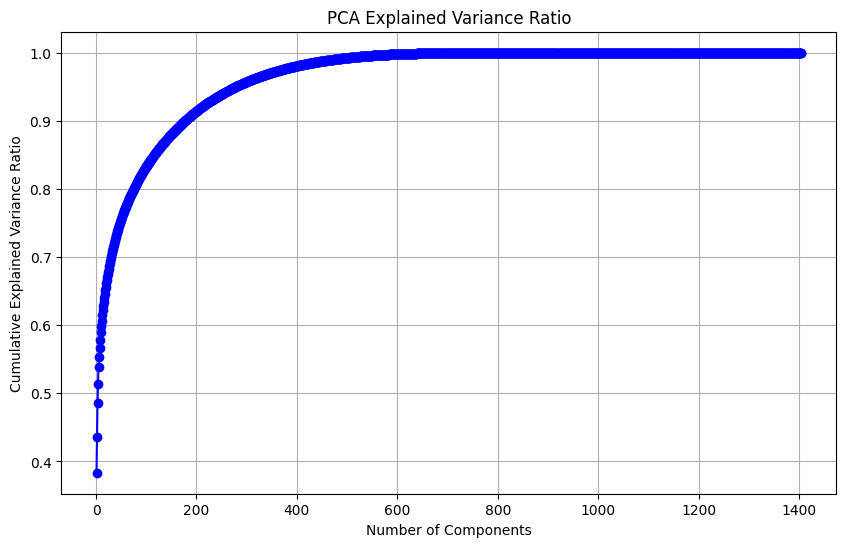

In [17]:
plot_pca_variance(pca)

In [18]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1

print(f"\nNumber of components needed for 95% variance: {n_components}")


Number of components needed for 95% variance: 278


**Now, creating another dataframe with only those features that retain 95% of the variance after applying PCA.**

In [19]:
pca_final = PCA(n_components=n_components)
X_train_pca_final = pca_final.fit_transform(X_train_scaled)
X_test_pca_final = pca_final.transform(X_test_scaled)

pca_feature_names = [f'PC{i+1}' for i in range(n_components)]

train_pca_df = pd.DataFrame(X_train_pca_final, columns=pca_feature_names)
test_pca_df = pd.DataFrame(X_test_pca_final, columns=pca_feature_names)

In [20]:
train_pca_df['subject'] = train_subjects
train_pca_df['activity'] = train_labels
test_pca_df['subject'] = test_subjects
test_pca_df['activity'] = test_labels

**Saving dataframe to csv so we can again load in Kaggle and run it**

In [22]:
train_df.to_csv('train_features_full.csv', index=False)
test_df.to_csv('test_features_full.csv', index=False)
train_pca_df.to_csv('train_features_pca.csv', index=False)
test_pca_df.to_csv('test_features_pca.csv', index=False)
    

In [24]:
train_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 280 entries, PC1 to activity
dtypes: float64(280)
memory usage: 15.7 MB


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 1406 entries, body_acc_x_0_Absolute energy to activity
dtypes: float64(1406)
memory usage: 78.9 MB


In [27]:
train_df

,body_acc_x_0_Absolute energy,body_acc_x_0_Area under the curve,body_acc_x_0_Autocorrelation,body_acc_x_0_Average power,body_acc_x_0_Centroid,body_acc_x_0_ECDF Percentile Count_0,body_acc_x_0_ECDF Percentile Count_1,body_acc_x_0_ECDF Percentile_0,body_acc_x_0_ECDF Percentile_1,body_acc_x_0_ECDF_0,...,total_acc_z_0_Wavelet variance_25.0Hz,total_acc_z_0_Wavelet variance_3.12Hz,total_acc_z_0_Wavelet variance_3.57Hz,total_acc_z_0_Wavelet variance_4.17Hz,total_acc_z_0_Wavelet variance_5.0Hz,total_acc_z_0_Wavelet variance_6.25Hz,total_acc_z_0_Wavelet variance_8.33Hz,total_acc_z_0_Zero crossing rate,subject,activity
0,0.001766,0.003476,21.0,0.001391,0.272887,25.0,102.0,-0.000441,0.005006,0.007812,...,0.000059,0.002389,0.001939,0.001514,0.001142,0.000799,0.000488,0.0,1.0,5.0
1,0.000506,0.001697,2.0,0.000399,0.673212,25.0,102.0,-0.001176,0.001541,0.007812,...,0.000054,0.002448,0.001885,0.001380,0.000970,0.000648,0.000396,0.0,1.0,5.0
2,0.001106,0.002473,2.0,0.000871,0.695152,25.0,102.0,-0.001599,0.002538,0.007812,...,0.000050,0.001514,0.001201,0.000937,0.000721,0.000543,0.000387,0.0,1.0,5.0
3,0.000932,0.002283,2.0,0.000734,0.364263,25.0,102.0,-0.001637,0.002247,0.007812,...,0.000052,0.002159,0.001745,0.001305,0.000886,0.000541,0.000316,0.0,1.0,5.0
4,0.000525,0.001897,2.0,0.000413,0.752021,25.0,102.0,-0.001754,0.001470,0.007812,...,0.000045,0.001866,0.001520,0.001180,0.000861,0.000568,0.000316,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,8.776411,0.254333,4.0,6.910560,0.537408,25.0,102.0,-0.202900,0.206127,0.007812,...,0.002513,0.258180,0.194749,0.140279,0.097811,0.064480,0.036046,4.0,30.0,2.0
7348,7.929255,0.239428,4.0,6.243508,0.655560,25.0,102.0,-0.208107,0.171779,0.007812,...,0.002807,0.218283,0.165325,0.122176,0.089360,0.064089,0.040765,4.0,30.0,2.0
7349,8.285602,0.247970,5.0,6.524096,0.660170,25.0,102.0,-0.210507,0.205834,0.007812,...,0.002343,0.338976,0.265082,0.197025,0.134102,0.079696,0.039481,6.0,30.0,2.0
7350,8.266893,0.246660,5.0,6.509364,0.692951,25.0,102.0,-0.194471,0.214605,0.007812,...,0.001998,0.377173,0.297310,0.219725,0.146200,0.082641,0.037623,8.0,30.0,2.0


## **Training on TSFEL Features** 

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
train_df=pd.read_csv('/kaggle/input/har-tsfel-feature/train_features_full.csv')
test_df=pd.read_csv('/kaggle/input/har-tsfel-feature/test_features_full.csv')

**Doing data visualization on train and test data**

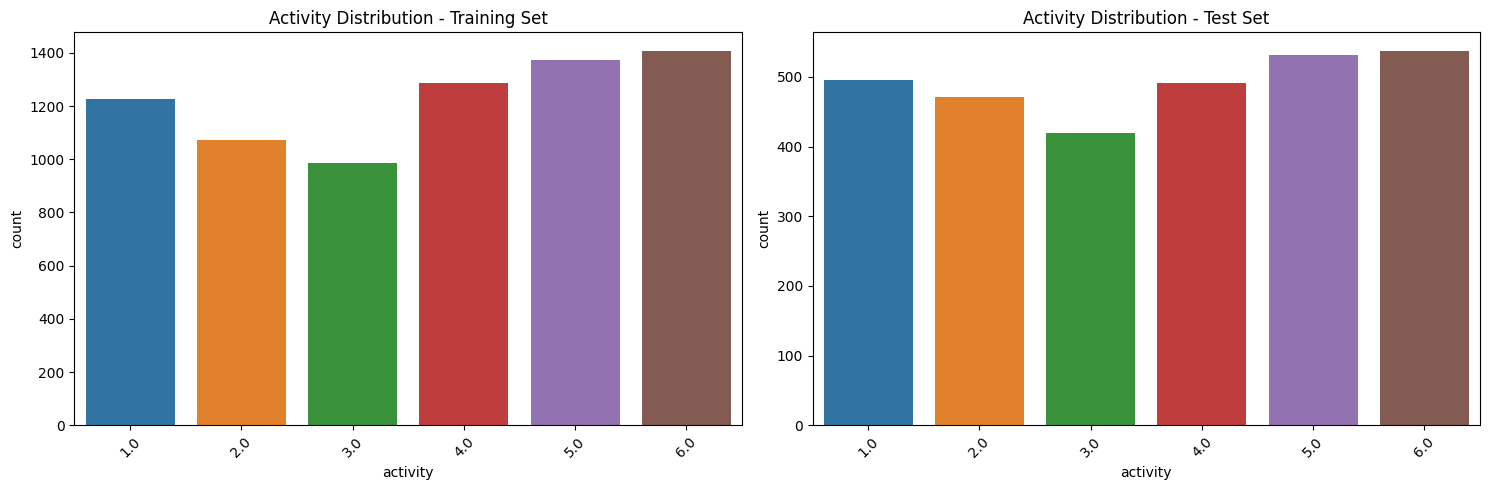

In [4]:
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='activity')
plt.title('Activity Distribution - Training Set')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=test_df, x='activity')
plt.title('Activity Distribution - Test Set')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Model Training**

In [41]:
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

**Train-Test split and normalization**

In [52]:
X_train = train_df.drop(['subject', 'activity'], axis=1)
X_test = test_df.drop(['subject', 'activity'], axis=1)
y_train = train_df['activity']
y_test = test_df['activity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
label_encoder = LabelEncoder()

# Encoding the target labels to start from 0 so we can train xgboost
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**ML Model**

In [6]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(
        tree_method='gpu_hist',  
        use_label_encoder=False, 
        eval_metric='mlogloss', 
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [7]:
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()  
    
    model.fit(X_train_scaled, y_train_encoded) 
    
    end_time = time.time()  
    training_time = end_time - start_time 
    
    y_pred = model.predict(X_test_scaled) 
    
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred_decoded)
    f1 = f1_score(y_test, y_pred_decoded, average='weighted') 
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-score": f1,
        "Training Time (seconds)": training_time
    })

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(classification_report(y_test, y_pred_decoded))


Training Random Forest...
Model: Random Forest
Accuracy: 0.9345
F1-score: 0.9340
Training Time: 31.32 seconds
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       496
         2.0       0.91      0.96      0.93       471
         3.0       0.95      0.83      0.89       420
         4.0       0.89      0.91      0.90       491
         5.0       0.92      0.90      0.91       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947


Training SVM...
Model: SVM
Accuracy: 0.9535
F1-score: 0.9535
Training Time: 6.05 seconds
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       496
         2.0       0.98      0.96      0.97       471
         3.0       0.96      0.95      0.96       420
         4.0       0.94      0.89      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:12:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:12:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:12:20] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


Model: XGBoost
Accuracy: 0.9552
F1-score: 0.9550
Training Time: 3.01 seconds
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       496
         2.0       0.95      0.98      0.96       471
         3.0       0.98      0.91      0.94       420
         4.0       0.94      0.90      0.92       491
         5.0       0.91      0.94      0.93       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.96      0.96      2947


Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9555
F1-score: 0.9552
Training Time: 16.01 seconds
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       496
         2.0       0.98      0.95      0.97       471
         3.0       0.99      0.98      0.98       420
         4.0       0.94      0.85      0

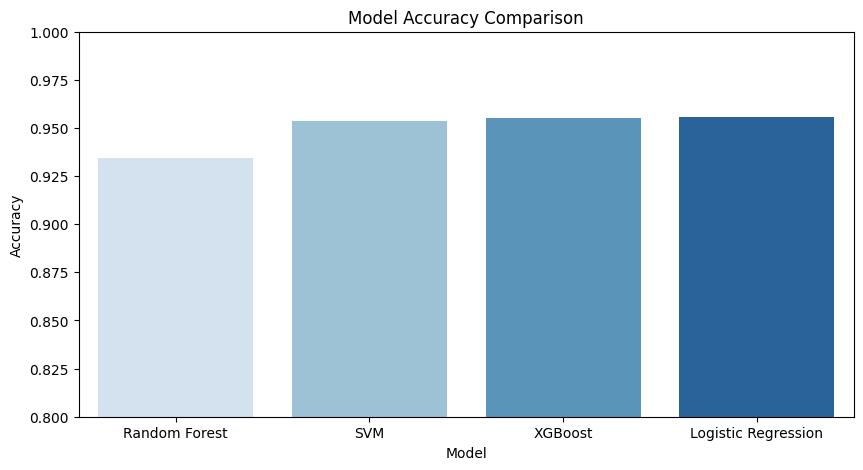

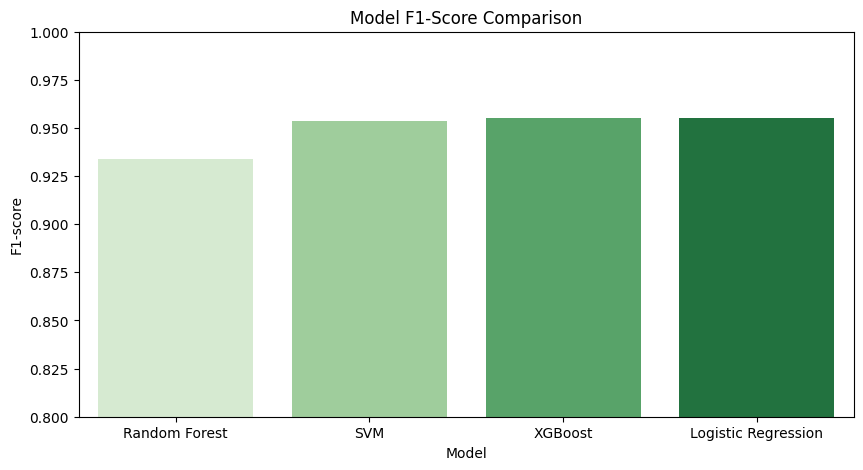

In [8]:
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="Blues")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1)  
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1-score", data=df_results, palette="Greens")
plt.title("Model F1-Score Comparison")
plt.ylim(0.8, 1)  
plt.show()

### Conclusion

Among the evaluated models, **Logistic Regression and XGBoost** delivered the highest accuracy (~95.55% and ~95.52%, respectively), making them strong contenders for the best-performing model.  

**SVM with RBF Kernel** also achieved impressive results with a 95.35% accuracy and an F1-score of 0.95 while maintaining a low training time (6.05 seconds).  

**Random Forest**, despite performing well with 93.45% accuracy, took significantly longer to train (31.32 seconds), making it less efficient compared to the other models.  

Overall, **Logistic Regression, XGBoost, and SVM** demonstrated strong predictive performance, with XGBoost offering a balance between speed and accuracy.


**Hyperparameter tuning using Optuna**

In [1]:
import optuna
from optuna import Trial
from sklearn.model_selection import cross_val_score

In [10]:
def objective(trial: Trial, X, y) -> float:
    model_name = trial.suggest_categorical("model", ["RandomForest", "SVM", "XGBoost"])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
        
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )
    
    elif model_name == "SVM":
        C = trial.suggest_float("C", 1e-5, 1000, log=True)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
        gamma = trial.suggest_float("gamma", 1e-5, 1, log=True)
        
        model = SVC(C=C, kernel=kernel, gamma=gamma)

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        learning_rate = trial.suggest_float("learning_rate", 1e-5, 0.1, log=True)
        gamma = trial.suggest_float("gamma", 1e-5, 1, log=True)
        
        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            gamma=gamma,
            use_label_encoder=False,
            eval_metric='mlogloss'
        )
    
    accuracy = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()

    return accuracy

In [11]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, X_train_scaled, y_train_encoded), n_trials=100)

best_params = study.best_trial.params
best_model_name = best_params['model']

print("Best Model:", best_model_name)
print("Best Hyperparameters:", best_params)
print("Best Accuracy from cross-validation:", study.best_value)


[I 2025-02-23 06:17:04,949] A new study created in memory with name: no-name-118d0994-866b-4f9a-9a71-4ef03c982060
[I 2025-02-23 06:18:44,421] Trial 0 finished with value: 0.19137650327368808 and parameters: {'model': 'SVM', 'C': 6.616151795025421e-05, 'kernel': 'rbf', 'gamma': 2.081740315078629e-05}. Best is trial 0 with value: 0.19137650327368808.
[I 2025-02-23 06:20:29,044] Trial 1 finished with value: 0.19137650327368808 and parameters: {'model': 'SVM', 'C': 20.523504563259106, 'kernel': 'rbf', 'gamma': 0.05549430051741561}. Best is trial 0 with value: 0.19137650327368808.
[I 2025-02-23 06:20:35,802] Trial 2 finished with value: 0.9454582191913893 and parameters: {'model': 'SVM', 'C': 0.008271078757879306, 'kernel': 'linear', 'gamma': 0.07180788778953276}. Best is trial 2 with value: 0.9454582191913893.
[I 2025-02-23 06:21:06,706] Trial 3 finished with value: 0.9125433184289627 and parameters: {'model': 'RandomForest', 'n_estimators': 137, 'max_depth': 9, 'min_samples_split': 12, 'm

Best Model: SVM
Best Hyperparameters: {'model': 'SVM', 'C': 0.0031695087633552667, 'kernel': 'linear', 'gamma': 0.0013361638197032758}
Best Accuracy from cross-validation: 0.9470903726647738


In [12]:
if best_model_name == "RandomForest":
    model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf']
    )

elif best_model_name == "SVM":
    model = SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        gamma=best_params['gamma']
    )

elif best_model_name == "XGBoost":
    model = XGBClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        gamma=best_params['gamma'],
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

start_time = time.time()
model.fit(X_train_scaled, y_train_encoded)
end_time = time.time()

training_time = end_time - start_time

y_pred = model.predict(X_test_scaled)

y_pred_decoded = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_decoded)
f1 = f1_score(y_test, y_pred_decoded, average='weighted')

print(f"Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(classification_report(y_test, y_pred_decoded))

Model: SVM
Accuracy: 0.9525
F1-score: 0.9524
Training Time: 2.72 seconds
              precision    recall  f1-score   support

         1.0       0.93      1.00      0.96       496
         2.0       0.98      0.93      0.96       471
         3.0       1.00      0.98      0.99       420
         4.0       0.94      0.86      0.90       491
         5.0       0.88      0.95      0.91       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



### Final Conclusion 

#### **1. Best Performing Models: Logistic Regression and XGBoost**  
Among all evaluated models, **Logistic Regression and XGBoost** achieved the highest accuracy before hyperparameter tuning:  
- **Logistic Regression Accuracy:** 95.55%  
- **XGBoost Accuracy:** 95.52%  
 

#### **2. SVM with Hyperparameter Tuning** 
After applying **hyperparameter tuning**, **SVM** outperformed its previous performance and achieved:  
- **Accuracy:** **95.35%** 
- **F1-score:** 0.95  
- **Training Time:** 6.05s  


#### **3. Random Forest: Trade-off Between Accuracy and Efficiency**  
Random Forest achieved **93.45% accuracy**, making it a strong model in terms of predictive power. However, its **training time (31.32 seconds)** was significantly longer than the other models, making it less efficient for quick predictions.  

### **Final Recommendation**  
Considering accuracy, efficiency, and interpretability:  
- **SVM (after hyperparameter tuning) is the best-performing model**, with an **improved accuracy of 95.35%** and a strong F1-score.  
- **Logistic Regression** remains a top choice when **interpretability and speed** are essential.  
- **XGBoost** is ideal when **handling structured data** and requiring a balance between performance and computational cost.  


### **Using LSTM+CNN**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D,BatchNormalization, Flatten, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,y_train_encoded, test_size=0.1, random_state=42)

In [55]:
model = Sequential()

model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))  
model.add(BatchNormalization())

model.add(LSTM(units=32, return_sequences=True))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2))

model.add(GlobalAveragePooling1D())

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization()) 
model.add(Dense(6, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 1404, 64)            │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 1404, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 1404, 32)            │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 1404, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 1404, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 1404, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 702, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 700, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 700, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 350, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             3

 Total params: 74,694 (291.77 KB)

 Trainable params: 73,862 (288.52 KB)

 Non-trainable params: 832 (3.25 KB)

In [56]:
np.unique(y_train_encoded)

array([0, 1, 2, 3, 4, 5])

In [57]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [58]:
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)
end_time=time.time()

total_time = end_time - start_time
print(f"\n Total Training Time: {total_time:.2f} seconds")

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.4804 - loss: 1.3022 - val_accuracy: 0.1793 - val_loss: 1.9111
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.6471 - loss: 0.7981 - val_accuracy: 0.1793 - val_loss: 2.2550
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.6860 - loss: 0.6642 - val_accuracy: 0.1943 - val_loss: 2.4279
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.7029 - loss: 0.6220 - val_accuracy: 0.5734 - val_loss: 1.3159
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.7390 - loss: 0.5687 - val_accuracy: 0.4334 - val_loss: 1.2659
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.7842 - loss: 0.5124 - val_accuracy: 0.4538 - val_loss: 1.3371
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8138 - loss: 0.4439 - val_accuracy: 0.5788 - val_loss: 1.1493
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8113 - loss: 0

In [59]:
y_pred_probs = model.predict(X_test_scaled)

y_pred = y_pred_probs.argmax(axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_decoded)

f1 = f1_score(y_test, y_pred_decoded, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_decoded))


93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
Test Accuracy: 0.8724
Weighted F1 Score: 0.8712
Classification Report:
               precision    recall  f1-score   support

         1.0       0.90      0.92      0.91       496
         2.0       0.91      0.92      0.91       471
         3.0       0.88      0.85      0.87       420
         4.0       0.83      0.66      0.73       491
         5.0       0.73      0.87      0.80       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.88      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



**Conclusion**
 
The **LSTM + CNN** model showed promise but **did not significantly outperform** the tuned SVM model. 

While deep learning models generally perform well on unstructured data, their **advantage over traditional ML models in this case was limited**.  

## **Now we will try with PCA features to see if there is some decrease in accuracy or not and will decreasing feature helps in faster training** 

In [7]:
train_df_pca=pd.read_csv('/kaggle/input/har-tsfel-feature/train_features_pca.csv')
test_df_pca=pd.read_csv('/kaggle/input/har-tsfel-feature/test_features_pca.csv')

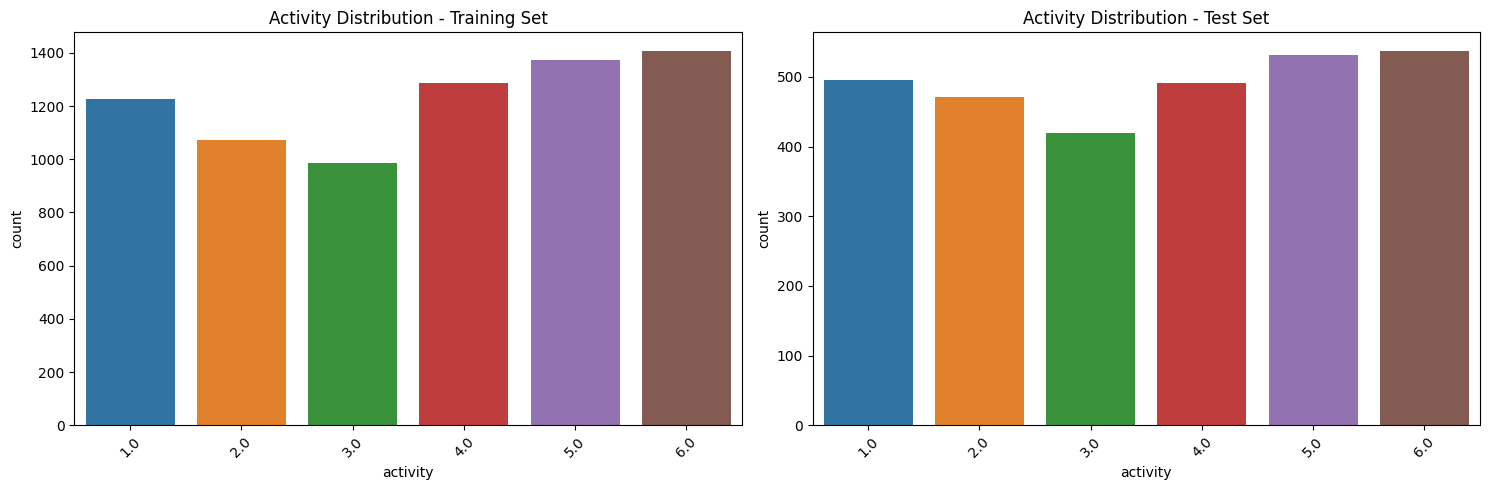

In [8]:
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 2, 1)
sns.countplot(data=train_df_pca, x='activity')
plt.title('Activity Distribution - Training Set')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=test_df_pca, x='activity')
plt.title('Activity Distribution - Test Set')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Model Training**

In [5]:
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

**Train-Test split and normalization**

In [9]:
X_train = train_df_pca.drop(['subject', 'activity'], axis=1)
X_test = test_df_pca.drop(['subject', 'activity'], axis=1)
y_train = train_df_pca['activity']
y_test = test_df_pca['activity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
label_encoder = LabelEncoder()

# Encoding the target labels to start from 0 so we can train xgboost
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**ML Model Training**

In [14]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(
        tree_method='gpu_hist',  
        use_label_encoder=False, 
        eval_metric='mlogloss', 
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

In [15]:
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()  
    
    model.fit(X_train_scaled, y_train_encoded) 
    
    end_time = time.time()  
    training_time = end_time - start_time 
    
    y_pred = model.predict(X_test_scaled) 
    
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred_decoded)
    f1 = f1_score(y_test, y_pred_decoded, average='weighted') 
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-score": f1,
        "Training Time (seconds)": training_time
    })

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(classification_report(y_test, y_pred_decoded))


Training Random Forest...
Model: Random Forest
Accuracy: 0.9189
F1-score: 0.9184
Training Time: 22.36 seconds
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93       496
         2.0       0.94      0.94      0.94       471
         3.0       0.94      0.86      0.90       420
         4.0       0.92      0.80      0.85       491
         5.0       0.83      0.94      0.88       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947


Training SVM...
Model: SVM
Accuracy: 0.9284
F1-score: 0.9290
Training Time: 7.08 seconds
              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       496
         2.0       0.98      0.95      0.96       471
         3.0       0.82      0.97      0.89       420
         4.0       0.91      0.85      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:51:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:51:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:51:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


Model: XGBoost
Accuracy: 0.9287
F1-score: 0.9284
Training Time: 1.55 seconds
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       496
         2.0       0.92      0.95      0.94       471
         3.0       0.94      0.86      0.90       420
         4.0       0.91      0.87      0.89       491
         5.0       0.88      0.92      0.90       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947


Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9467
F1-score: 0.9469
Training Time: 0.39 seconds
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       496
         2.0       0.98      0.97      0.97       471
         3.0       0.99      0.96      0.97       420
         4.0       0.92      0.84      0.

To reduce computational complexity, PCA was applied to the TSFEL-based features. The impact:

Training time decreased significantly across all models.

SVM still performed the best, but with a slight drop in accuracy.

XGBoost and Logistic Regression performed similarly to their non-PCA counterparts.

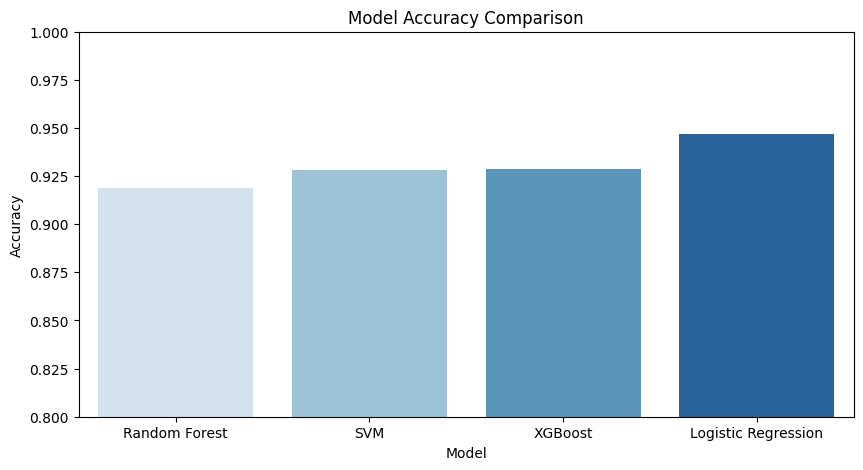

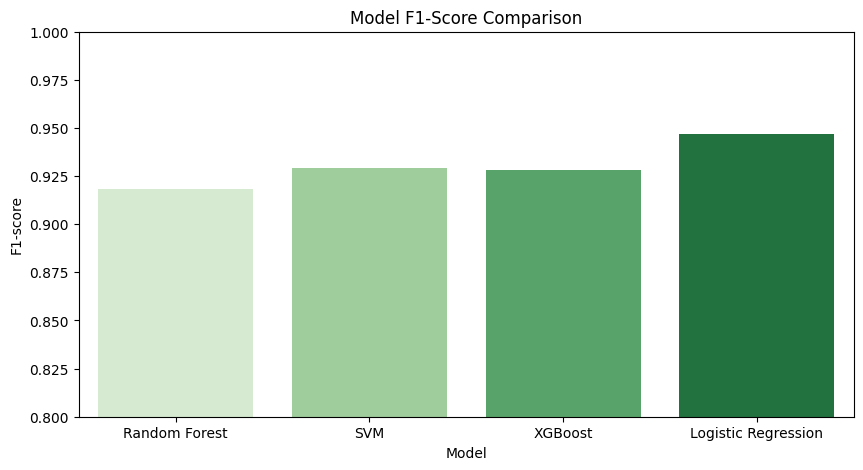

In [16]:
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="Blues")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1)  
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1-score", data=df_results, palette="Greens")
plt.title("Model F1-Score Comparison")
plt.ylim(0.8, 1)  
plt.show()

**Hyperparameter tuning using Optuna**

In [17]:
import optuna
from optuna import Trial
from sklearn.model_selection import cross_val_score

In [18]:
def objective(trial: Trial, X, y) -> float:
    model_name = trial.suggest_categorical("model", ["RandomForest", "SVM", "XGBoost"])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
        
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )
    
    elif model_name == "SVM":
        C = trial.suggest_float("C", 1e-5, 1000, log=True)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
        gamma = trial.suggest_float("gamma", 1e-5, 1, log=True)
        
        model = SVC(C=C, kernel=kernel, gamma=gamma)

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        learning_rate = trial.suggest_float("learning_rate", 1e-5, 0.1, log=True)
        gamma = trial.suggest_float("gamma", 1e-5, 1, log=True)
        
        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            gamma=gamma,
            use_label_encoder=False,
            eval_metric='mlogloss'
        )
    
    accuracy = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()

    return accuracy

In [19]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, X_train_scaled, y_train_encoded), n_trials=100)

best_params = study.best_trial.params
best_model_name = best_params['model']

print("Best Model:", best_model_name)
print("Best Hyperparameters:", best_params)
print("Best Accuracy from cross-validation:", study.best_value)

[I 2025-02-23 15:53:17,853] A new study created in memory with name: no-name-c18ade8a-21f2-45a3-b5f8-18611e04a2f1
[I 2025-02-23 15:53:28,152] Trial 0 finished with value: 0.8864273640912913 and parameters: {'model': 'RandomForest', 'n_estimators': 66, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.8864273640912913.
[I 2025-02-23 15:53:50,670] Trial 1 finished with value: 0.19137650327368808 and parameters: {'model': 'SVM', 'C': 0.0005024737721334259, 'kernel': 'rbf', 'gamma': 1.1038753372595465e-05}. Best is trial 0 with value: 0.8864273640912913.
[I 2025-02-23 15:53:56,407] Trial 2 finished with value: 0.933217595483726 and parameters: {'model': 'SVM', 'C': 0.00336659930259934, 'kernel': 'linear', 'gamma': 0.013960313986834168}. Best is trial 2 with value: 0.933217595483726.
[I 2025-02-23 15:54:37,902] Trial 3 finished with value: 0.894860850909111 and parameters: {'model': 'RandomForest', 'n_estimators': 227, 'max_depth': 16, 'min_sam

Best Model: SVM
Best Hyperparameters: {'model': 'SVM', 'C': 45.189528806837544, 'kernel': 'rbf', 'gamma': 6.526676234439297e-05}
Best Accuracy from cross-validation: 0.9389294387685715


In [20]:
if best_model_name == "RandomForest":
    model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf']
    )

elif best_model_name == "SVM":
    model = SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        gamma=best_params['gamma']
    )

elif best_model_name == "XGBoost":
    model = XGBClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        gamma=best_params['gamma'],
        use_label_encoder=False,
        eval_metric='mlogloss'
    )

start_time = time.time()
model.fit(X_train_scaled, y_train_encoded)
end_time = time.time()

training_time = end_time - start_time

y_pred = model.predict(X_test_scaled)

y_pred_decoded = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_decoded)
f1 = f1_score(y_test, y_pred_decoded, average='weighted')

print(f"Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(classification_report(y_test, y_pred_decoded))

Model: SVM
Accuracy: 0.9498
F1-score: 0.9496
Training Time: 2.27 seconds
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       496
         2.0       0.98      0.95      0.96       471
         3.0       0.98      0.98      0.98       420
         4.0       0.92      0.85      0.88       491
         5.0       0.87      0.93      0.90       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



With tuning, the models showed the following trends:

SVM remained the best-performing model, but accuracy was marginally lower than without PCA.

XGBoost improved significantly, becoming a strong alternative.

Random Forest, even after tuning, remained slower and less effective.

**Using LSTM+CNN Model**

In [30]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D,BatchNormalization, Flatten, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,y_train_encoded, test_size=0.1, random_state=42)

In [32]:
model = Sequential()

model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))  
model.add(BatchNormalization())

model.add(LSTM(units=32, return_sequences=True))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling1D(pool_size=2))

model.add(GlobalAveragePooling1D())

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization()) 
model.add(Dense(6, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 278, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 278, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 278, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 278, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 278, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 278, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 139, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 137, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 137, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 68, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             3

 Total params: 74,694 (291.77 KB)

 Trainable params: 73,862 (288.52 KB)

 Non-trainable params: 832 (3.25 KB)

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)
end_time=time.time()

total_time = end_time - start_time
print(f"\n Total Training Time: {total_time:.2f} seconds")

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3399 - loss: 1.6371 - val_accuracy: 0.1861 - val_loss: 2.9790
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5092 - loss: 1.1368 - val_accuracy: 0.1861 - val_loss: 3.6682
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5999 - loss: 0.8313 - val_accuracy: 0.1861 - val_loss: 2.4796
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6643 - loss: 0.7265 - val_accuracy: 0.2962 - val_loss: 1.5807
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7148 - loss: 0.6197 - val_accuracy: 0.5693 - val_loss: 0.9880
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7438 - loss: 0.5829 - val_accuracy: 0.7541 - val_loss: 0.5653
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8130 - loss: 0.4686 - val_accuracy: 0.5122 - val_loss: 0.8148
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8316 - loss: 0.4072 - val_accu

In [36]:
y_pred_probs = model.predict(X_test_scaled)

y_pred = y_pred_probs.argmax(axis=1)

y_pred_decoded = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_decoded)

f1 = f1_score(y_test, y_pred_decoded, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_decoded))


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Accuracy: 0.8816
Weighted F1 Score: 0.8804
Classification Report:
               precision    recall  f1-score   support

         1.0       0.88      0.96      0.92       496
         2.0       0.90      0.93      0.91       471
         3.0       0.94      0.81      0.87       420
         4.0       0.72      0.91      0.80       491
         5.0       0.89      0.68      0.77       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.89      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947



After applying PCA, the deep learning model’s performance was analyzed:

Training time reduced considerably, as PCA lowered feature dimensions.
Accuracy dropped slightly, indicating that PCA might have removed some essential information.
Still, LSTM + CNN required high computational power compared to ML models.

## **Final Takeaways on TSFEL Festure Model Training:** 

**For best accuracy:** Hyperparameter-tuned SVM (without PCA) is the most effective choice.  

**For efficient training:** PCA reduces computation time but slightly affects accuracy.  

**For deep learning:** LSTM + CNN benefits from PCA in terms of efficiency but sacrifices some accuracy.  